## k nearest neighbors 

### Discrete Values

#### In the last module, we built a linear regression model to predict a continuous value, the median home value in Boston. In this module, we will work through classification problems whose task is to predict a discrete value.

#### Discrete data are only able to have certain values, while continuous data can take on any value.

#### Examples of classification problems involving discrete data values are:
#### • to predict whether a breast cancer is benign or malignant given a set of features
#### • to classify an image as containing cats or dogs or horses
#### • to predict whether an email is spam or not from a given email address

#### In each of the examples, the labels come in categorical form and represent a finite number of classes.

### Binary and Multi-class Classification

#### There are two types of classification: binary and multi-class. If there are two classes to predict, that is a binary classification problem, for example, a benign or malignant tumor. When there are more than two classes, the task is a multi-classification problem. For example, classifying the species of iris, which can be versicolor, virqinica, or setosa, based on their sepal and petal characteristics.

#### Common algorithms for classification include logistic regression, k nearest neighbors, decision trees, naive bayes, support vector machines, neural networks, etc. Here we will learn how to use k nearest neighbors to classify iris species.

#### Supervised learning problems are grouped into regression and classification problems. Both problems have as a goal the construction of a mapping function from input variables (X) to an output variable (y). The difference is that the output variable is continuous in regression and categorical for classification.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Iris Dataset

#### The famous iris database, first used by Sir R. A. Fisher, is perhaps the best known dataset to be found in pattern recognition literature. There are 150 iris plants, each with 4 numeric attributes: sepal length in cm, sepal width in cm, petal length in cm, and petal width in cm. The task is to predict each plant as an iris-setosa, an iris-versicolor, or an iris-virginica based on these attributes.

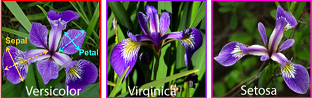

#### The dataset is stored in a csv file, we can load it as a DataFrame using read_csv() in library pandas:

In [2]:
# Alternativa para ler o dataset
#from sklearn.datasets import load_iris
#iris=load_iris()
#df = pd.DataFrame(iris.data,columns=iris.feature_names) 
#df['species'] = iris.target 
#df.head()

In [3]:
iris = pd.read_excel('iris.xlsx')
iris.shape

(150, 5)

#### We use the .head() function to view the first 5 rows:

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [7]:
iris['species'].value_counts() # importante saber se os dados estão balanceados

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

### Univariate Plot

#### To better understand each attribute, start with univariate plots, that is, plots of each individual variable.

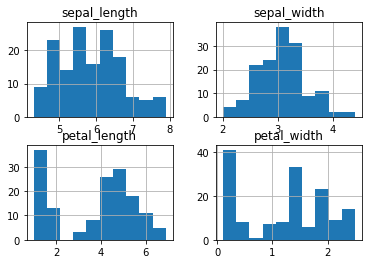

In [8]:
iris.hist();

#### This gives us a much clearer idea of the distribution of the input variable, showing that both sepal length and sepal width have a normal (Gaussian) distribution. That is, the distribution has a beautiful symmetric bell shape. However, the length of petals is not normal. Its plot shows two modes, one peak happening near 0 and the other around 5. Less patterns were observed for the petal width.

#### Histograms are a type of bar chart that displays the counts or relative frequencies of values falling in different class intervals or ranges. There are more univariate summary plots including density plots and boxplots.

### Multivariate Plot

#### To see the interactions between attributes we use scatter plots. However, it's difficult to see if there's any grouping without any indication of the true species of the flower that a datapoint represents. Therefore, we define a color code for each species to differentiate species visually:

<function matplotlib.pyplot.show(close=None, block=None)>

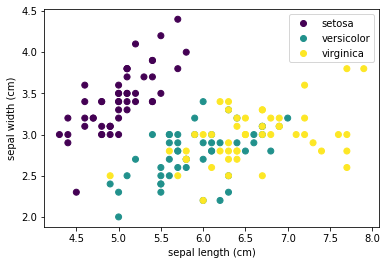

In [9]:
# build a dict mapping species to an integer code
inv_name_dict = {'setosa':0, 'versicolor':1, 'virginica':2}

# build integer color code 0/1/2
colors = [inv_name_dict[item] for item in iris['species']]

#scatter plot
scatter = plt.scatter(iris['sepal_length'], iris['sepal_width'], c=colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

## add legend 
plt.legend(handles=scatter.legend_elements()[0], labels=inv_name_dict.keys())
plt.show

#### Using sepal_length and sepal_width features, we can distinguish iris-setosa from others; separating iris-versicolor from iris-virginica is harder because of the overlap as seen by the green and yellow datapoints.

#### Similarly, between petal length and width:

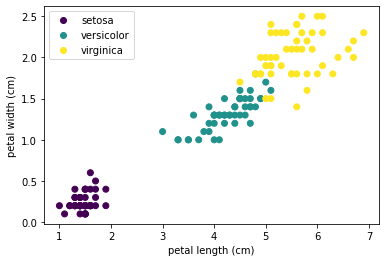

In [10]:
#scatter plot
scatter = plt.scatter(iris['petal_length'], iris['petal_width'], c=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# add legend
plt.legend(handles=scatter.legend_elements()[0], labels=inv_name_dict.keys())
plt.show()

#### Interestingly, the length and width of the petal are highly correlated, and these two features are very useful to identify various iris species. It is notable that the boundary between iris-versicolor and iris-virginica remains a bit fuzzy, indicating the difficulties for some classifiers. It is worth keeping in mind when training to decide which features we should use.

#### To see scatter plots of all pairs of features, use pandas.plotting.scatter_matrix(). Besides the histograms of individual variables along the diagonal, it will show the scatter plots of all pairs of attributes to help spot structured relationships between features.

### K nearest neighbors

#### K nearest neighbors (knn) is a supervised machine learning model that takes a data point, looks at its 'k' closest labeled data points, and assigns the label by a majority vote.

#### Here we see that changing k could affect the output of the model. In knn, k is a hyperparameter. A hyperparameter in machine learning is a parameter whose value is set before the learning process begins. We will learn how to tune the hyperparameter later.

#### For example, in the figure below, there are two classes: blue squares and red triangles. What label should we assign to the green dot, with unknown label, based on the 3nn algorithm, i.e., when k is 3? Of the 3 closest data points from the green dot (solid line circle), two are red triangles and one is blue square, thus the green dot is predicted to be a red triangle. If k is 5 (dashed line circle), it is then classified as a blue square (3 blue squares versus 2 red triangles, blue squares are the majority).

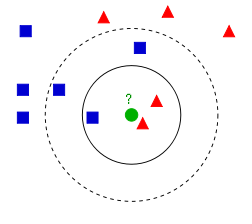

#### In scikit-learn, the k nearest neighbors algorithm is implemented in sklearn.neighbors module:

In [11]:
from sklearn.neighbors import KNeighborsClassifier 

#### Consider, in our iris dataset, the three nearest neighbors of the data pointed by the red arrow as indicated below:

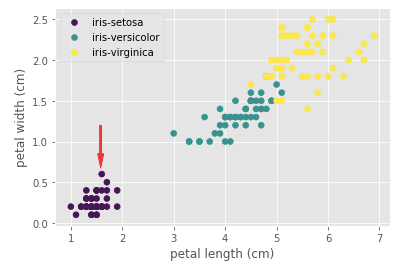

#### All nearest neighbors are iris-setosa (i.e., purple data points); thus by 3-nn, the pointed datum should be labeled as iris-setosa as well.

#### K nearest neighbors can also be used for regression problems. The difference lies in prediction. Instead of a majority vote, knn for regression makes a prediction using the mean labels of the k closest data points.

### Data Preparation

#### Earlier we identified that the length and the width of the petals are the most useful features to separate the species; we then define the features and labels as follows:

In [12]:
X = iris[['petal_length', 'petal_width']]
y = iris['species']

#### Recall that to assess the performance of the model, we do so on data that is unseen by the model construction. As a result, we set aside some portion of the data as a test set to mimic the unknown data the model will be presented with in the future. As done in the previous module, we use train_test_split in sklearn.model_selection.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

#### We use a 70-30 split, i.e., 70% of the data is for training and 30% for testing. Note that we specified the split was stratified by label (y). This is done to ensure that the distribution of labels remains similar in both train and test sets:

In [14]:
y_train.value_counts()
y_test.value_counts()

virginica     15
setosa        15
versicolor    15
Name: species, dtype: int64

#### In classifications, stratified sampling is often chosen to ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set.

### Modeling

#### Now we are ready to build and train the model knn. First we import the class of the model:

In [15]:
knn = KNeighborsClassifier(n_neighbors=5) #k=5 escolhido de maneira aleatória

#### Note that the only parameter we need to set in this problem is n_neighbors, or k as in knn. We set k to be 5 by random choice.

#### Use the data X_train and y_train to train the model:

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### It outputs the trained model. We use most the default values for the parameters, e.g., metric = 'minkowski' and p = 2 together defines that the distance is euclidean distance.

#### For details on the use of other parameters, refer to scikit-learn documentation.

### Label Prediction

#### To make a prediction in scikit learn, we can call the method predict(). We are trying to predict the species of iris using given features in feature matrix X.
#### Let’s make the predictions on the test data set and save the output in pred for later review

In [17]:
pred = knn.predict(X_test) ## previsão do modelo

#### Let’s review the first five predictions:

In [18]:
pred[:5]
# ['virginica', 'setosa', 'setosa', 'versicolor', 'versicolor']

array(['virginica', 'setosa', 'setosa', 'versicolor', 'versicolor'],
      dtype=object)

#### Each prediction is a species of iris and stored in a 1darray.
#### predict() returns an array of predicted class labels for the predictor data.

### Probability Prediction

#### Of all classification algorithms implemented in scikit learn, there is an additional method 'predict_prob'. Instead of splitting the label, it outputs the probability for the target in array form. Let’s take a look at what the predicted probabilities are for the 11th and 12th flowers:

In [19]:
y_pred_prob = knn.predict_proba(X_test)
y_pred_prob[10:12]
# [[1.,0.,0.], [0.,0.2,0.8]]

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8]])

#### For example, the probability of the 11th flower being predicted an iris-setosa is 1, an iris-versicolor and an iris-virginica are both 0. For the next flower, there is a 20% chance that it would be classified as iris-versicolor but 80% chance to be iris-virginica. What it tells us is that of the five nearest neighbours of the 12th flower in the testing set, 1 is an iris-versicolor, the rest 4 are iris-virginica. To see the corresponding predictions:

In [20]:
y_pred=knn.predict(X_test)
y_pred[10:12]
# ['setosa','virginica']

array(['setosa', 'virginica'], dtype=object)

### Accuracy

#### In classification the most straightforward metric is accuracy. It calculates the proportion of data points whose predicted labels exactly match the observed labels.

In [21]:
(y_pred==y_test.values).sum()
y_test.size

45

#### The classifier made one mistake. Thus, the accuracy is 44/45:

In [22]:
(y_pred==y_test.values).sum()/y_test.size #precisão de aproximadamente 98%

0.9777777777777777

### Confusion Matrix

#### Classification accuracy alone can be misleading if there is an unequal number of observations in each class or if there are more than two classes in the dataset. Calculating a confusion matrix will provide a better idea of what the classification is getting right and what types of errors it is making.
#### What is a confusion matrix? It is a summary of the counts of correct and incorrect predictions, broken down by each class.
#### In classifying the iris, we can use confusion_matrix() under module sklearn.metrics:

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=['setosa','versicolor','virginica'])

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

#### We can visualize the confusion matrix:

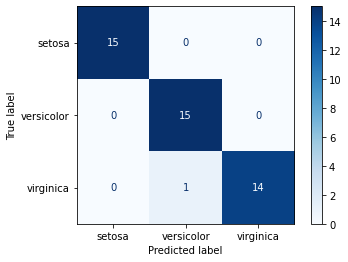

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues);

#### Here we specified the labels in order. Each column of the matrix corresponds to a predicted class, and each row corresponds to an actual class. So the row sums up to the total number of instances of the class.
#### The first row corresponds to the actual iris-setosa; [15, 0, 0] indicates that 15 of iris-setosa are correctly predicted, and none are mislabeled; while the last row [0, 1, 14] suggests that of 15 actual iris-virginica, 0 were predicted as iris-setosa, 1 was predicted to be iris-versicolor, and the remaining 14 were correctly identified as iris-virginica. This is consistent with our observation during exploratory data analysis, that is, there was some overlap between the two species on the scatter plot and it is more difficult to distinguish iris-versicolor from iris-virginica than identifying iris-setosa.
#### A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

### K-fold Cross Validation

#### Previously we made train-test split before fitting the model so that we can report the model performance on the test data. This is a simple kind of cross validation technique, also known as the holdout method. However, the split is random, as a result, model performance can be sensitive to how the data is split. To overcome this, we introduce k-fold cross validation.
#### In k fold cross validation, the data is divided into k subsets. Then the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set and the other k-1 subsets are combined to train the model. Then the accuracy is averaged over k trials to provide total effectiveness of the model. In this way, all data points are used; and there are more metrics so we don’t rely on one test data for model performance evaluation.
#### The simplest way to use k-fold cross-validation in scikit-learn is to call the cross_val_score function on the model and the dataset:

In [25]:
from sklearn.model_selection import cross_val_score
# create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
# now we are fitting 3nn model

#### Each of the holdout set contains 20% of the original data.

In [26]:
# train model with 5-fold cv
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

In [27]:
# print each cv score (accuracy)
print(cv_scores)

[0.96666667 0.96666667 0.9        0.93333333 1.        ]


#### As shown, due to the random assignments, the accuracies on the holdsets fluctuates from 0.9 to 1.

In [28]:
# then average them
cv_scores.mean()

0.9533333333333334

#### We can not rely on one single train-test split, rather we report that the 3nn model has an accuracy of 95.33% based on a 5-fold cross validation.
#### As a general rule, 5-fold or 10-fold cross validation is preferred; but there is no formal rule. As k gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller.

### Grid Search

#### When we built our first knn model, we set the hyperparameter k to 5, and then to 3 later in k-fold cross validation; random choices really. What is the best k? Finding the optimal k is called tuning the hyperparameter. A handy tool is grid search. In scikit-learn, we use GridSearchCV, which trains our model multiple times on a range of values specified with the param_grid parameter and computes cross validation score, so that we can check which of our values for the tested hyperparameter performed the best.

In [29]:
from sklearn.model_selection import GridSearchCV
# create new a knn model
knn2 = KNeighborsClassifier()
# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}
# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])})

#### To check the top performing n_neighbors value:

In [30]:
knn_gscv.best_params_
# to check the top performing n_neighbors

{'n_neighbors': 4}

#### We can see that 4 is the best value for n_neighbors. What is the accuracy of the model when k is 4?

In [31]:
knn_gscv.best_score_

0.9666666666666668

#### By using grid search to find the optimal hyperparameter for our model, it improves the model accuracy by over 1%.

#### Now we are ready to build the final model:


In [32]:
knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X,y)
y_pred=knn_final.predict(X)
knn_final.score(X,y)

0.9733333333333334

#### We can report that our final model, 4nn, has an accuracy of 97.3% in predicting the species of iris!

#### As técnicas de validação cruzada k-fold e parâmetros de ajuste com pesquisa de grade são aplicáveis ​​a problemas de classificação e regressão.

## Deploy 


### Label Prediction with New Data

#### Now we are ready to deploy the model knn_final'. We take some measurements of an iris and record that the length and width of its sepal are 5.84 cm and 3.06 cm, respectively, and the length and width of its petal are 3.76 cm and 1.20 cm, respectively.
#### Use model.predict. Since the model was trained on the length and width of petals, that’s the data we will need to make a prediction. Let’s put the petal length and petal width into a numpy array:

In [43]:
new_data=np.array([3.76,1.20])

#### feeding the model

#### When we trained the model, the data is 2D DataFrame, so the model was expecting a 2D array, which could be numpy array or pandas DataFrame. Now new_data is a 1D array, we need to make it 2D as the error message suggested:

In [44]:
new_data=new_data.reshape(1,-1)

#### Now we are ready to make a label prediction:

In [45]:
knn_final.predict(new_data)

array(['versicolor'], dtype=object)

#### Our model predicts that this iris is a versicolor.

### Probability Prediction with New Data

#### Let's collect more data: three plants of iris share the same petal width, 2.25cm, but are different in the length of the petal: 5.03 cm, 3.85 cm, and 1.77 cm, respectively. We store the new data into a 2D array as follows:

In [46]:
new_data2=np.array([[3.76,1.2],[5.25,1.2],[1.58,1.2]])

In [47]:
knn_final.predict(new_data2)

array(['versicolor', 'virginica', 'setosa'], dtype=object)

#### Recall that in classifications, it is more common to predict the probability of each data point being assigned to each label:

In [49]:
knn_final.predict_proba(new_data2)

array([[0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [1.  , 0.  , 0.  ]])

#### Each row sums to 1. Take the second iris, our model predicts that there is a probability of 25% that the iris would be versicolor, and 75% virginica. This is consistent with the label prediction: virginica.

## Final Test 

## Data Science - Binary Disorder


#### Confusion matrix of binary classification.

#### For binary classifications, a confusion matrix is a two-by-two matrix to visualize the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class.

### Task
#### Given two lists of 1s and 0s (1 represents the true label, and 0 represents the false false) of the same length, output a 2darrary of counts, each cell is defined as follows

#### Top left: Predicted true and actually true (True positive)
#### Top right: Predicted true but actually false (False positive)
#### Bottom left: Predicted false but actually true (False negative)
#### Bottom right: Predicted false and actually false (True negative)

### Input Format
#### First line: a list of 1s and 0s, separated by space. They are the actual binary labels.
#### Second line: a list of 1s and 0s, the length is the same as the first line. They represented the predicted labels.

### Output Format
#### A numpy 2darray of two rows and two columns, the first row contains counts of true positives and false positives and the second row contains counts of false negatives and true negatives.

#### Sample Input
#### 1 1 0 0
#### 1 0 0 0

In [ ]:
y_true = [int(x) for x in input().split()]
y_pred =  [int(x) for x in input().split()]
from sklearn.metrics import confusion_matrix
import numpy as np
s =confusion_matrix(y_true, y_pred)
a=np.flip(s)
s[0][0], s[-1][-1]=s[-1][-1], s[0][0]
s=s.astype(float)
print(s)